In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import missingno as msno
from preprocessamento import preprocessamento 

arquivo = r'arquivos\com.samsung.shealth.tracker.heart_rate.20251215221761.csv'

df = preprocessamento.limpeza_dados(arquivo) 

df.head()

Cabeçalho corrigido, pronto para uso no DataFrame.

Coletadas 12737 linhas de dados.


,tag_id,com.samsung.health.heart_rate.create_sh_ver,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.start_time,com.samsung.health.heart_rate.custom,com.samsung.health.heart_rate.binning_data,com.samsung.health.heart_rate.modify_sh_ver,com.samsung.health.heart_rate.update_time,com.samsung.health.heart_rate.create_time,com.samsung.health.heart_rate.client_data_id,com.samsung.health.heart_rate.max,com.samsung.health.heart_rate.min,com.samsung.health.heart_rate.client_data_ver,com.samsung.health.heart_rate.time_offset,com.samsung.health.heart_rate.deviceuuid,com.samsung.health.heart_rate.comment,com.samsung.health.heart_rate.pkg_name,com.samsung.health.heart_rate.end_time,com.samsung.health.heart_rate.datauuid,com.samsung.health.heart_rate.heart_rate
0,21312,62981551,1,2025-11-12 14:03:02.880,,,62981551,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,,,,,UTC-0300,9cX1oNetDs,,com.sec.android.app.shealth,2025-11-12 14:03:02.880,12d8294b-e6e6-4108-995b-bc998b92485d,123.0
1,21312,62981551,1,2025-11-12 14:06:58.284,,,62981551,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,,,,,UTC-0300,9cX1oNetDs,,com.sec.android.app.shealth,2025-11-12 14:06:58.284,bbdc2044-2d85-4562-9808-91de241b9a2b,77.0
2,21312,62981551,1,2025-11-12 16:26:49.104,,,62981551,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,,,,,UTC-0300,9cX1oNetDs,,com.sec.android.app.shealth,2025-11-12 16:26:49.104,fa121816-c833-49d8-946a-1c3db178f96e,91.0
3,21312,62981551,1,2025-11-12 17:06:00.332,,,62981551,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,,,,,UTC-0300,9cX1oNetDs,,com.sec.android.app.shealth,2025-11-12 17:06:00.332,b5cd1647-fffa-4af6-867c-5477d4ada3fc,91.0
4,21312,62981551,1,2025-11-12 17:35:57.258,,,62981551,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,,,,,UTC-0300,9cX1oNetDs,,com.sec.android.app.shealth,2025-11-12 17:35:57.258,99783445-4ac0-4cff-bc8c-a128f29cfe0c,89.0


##### 🔎 Há muitas colunas desnecessárias. O objetivo da análise é **chegar ao meu BPM médio e analisar suas variações**. Vamos restringir as colunas a isso.

In [2]:
# CONFIRMANDO AS COLUNAS PRESENTES
df.columns

Index(['tag_id', 'com.samsung.health.heart_rate.create_sh_ver',
       'com.samsung.health.heart_rate.heart_beat_count',
       'com.samsung.health.heart_rate.start_time',
       'com.samsung.health.heart_rate.custom',
       'com.samsung.health.heart_rate.binning_data',
       'com.samsung.health.heart_rate.modify_sh_ver',
       'com.samsung.health.heart_rate.update_time',
       'com.samsung.health.heart_rate.create_time',
       'com.samsung.health.heart_rate.client_data_id',
       'com.samsung.health.heart_rate.max',
       'com.samsung.health.heart_rate.min',
       'com.samsung.health.heart_rate.client_data_ver',
       'com.samsung.health.heart_rate.time_offset',
       'com.samsung.health.heart_rate.deviceuuid',
       'com.samsung.health.heart_rate.comment',
       'com.samsung.health.heart_rate.pkg_name',
       'com.samsung.health.heart_rate.end_time',
       'com.samsung.health.heart_rate.datauuid',
       'com.samsung.health.heart_rate.heart_rate'],
      dtype='object')

In [3]:
# SELECIONANDO APENAS AS MAIS INTERESSANTES
df_selecionadas = df[['com.samsung.health.heart_rate.start_time',       'com.samsung.health.heart_rate.update_time',
       'com.samsung.health.heart_rate.create_time',       'com.samsung.health.heart_rate.max',
       'com.samsung.health.heart_rate.min',       'com.samsung.health.heart_rate.end_time',
       'com.samsung.health.heart_rate.heart_rate']]

In [4]:
# LIMPANDO NOMES DAS COLUNAS
novas_colunas = []
for column in df_selecionadas.columns:
    column = column.replace('com.samsung.health.heart_rate.','')
    novas_colunas.append(column)

print(novas_colunas)

['start_time', 'update_time', 'create_time', 'max', 'min', 'end_time', 'heart_rate']


In [5]:
# CONFIRMANDO OPERAÇÃO DE RENAME
df_selecionadas.columns = novas_colunas
df_selecionadas.head()

,start_time,update_time,create_time,max,min,end_time,heart_rate
0,2025-11-12 14:03:02.880,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,,,2025-11-12 14:03:02.880,123.0
1,2025-11-12 14:06:58.284,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,,,2025-11-12 14:06:58.284,77.0
2,2025-11-12 16:26:49.104,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,,,2025-11-12 16:26:49.104,91.0
3,2025-11-12 17:06:00.332,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,,,2025-11-12 17:06:00.332,91.0
4,2025-11-12 17:35:57.258,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,,,2025-11-12 17:35:57.258,89.0


##### 🔎 Com o DataFrame adaptado, podemos partir para análise em si. Como estão constituídas as colunas selecionadas?

In [6]:
df_selecionadas.describe()

,start_time,update_time,create_time,max,min,end_time,heart_rate
count,12737,12737,12737,12737,12737,12737,12737
unique,12737,12733,12733,44,36,12737,117
top,2025-11-12 14:03:02.880,2023-10-28 23:35:00.246,2023-10-28 23:35:00.246,,,2025-11-12 14:03:02.880,94.0
freq,1,2,2,12418,12418,1,376


##### 🔎 MAX e MIN inicialmente pareciam interessantes para análise de variação, mas parecem ter muitos valores nulos. Quantos?

<Axes: >

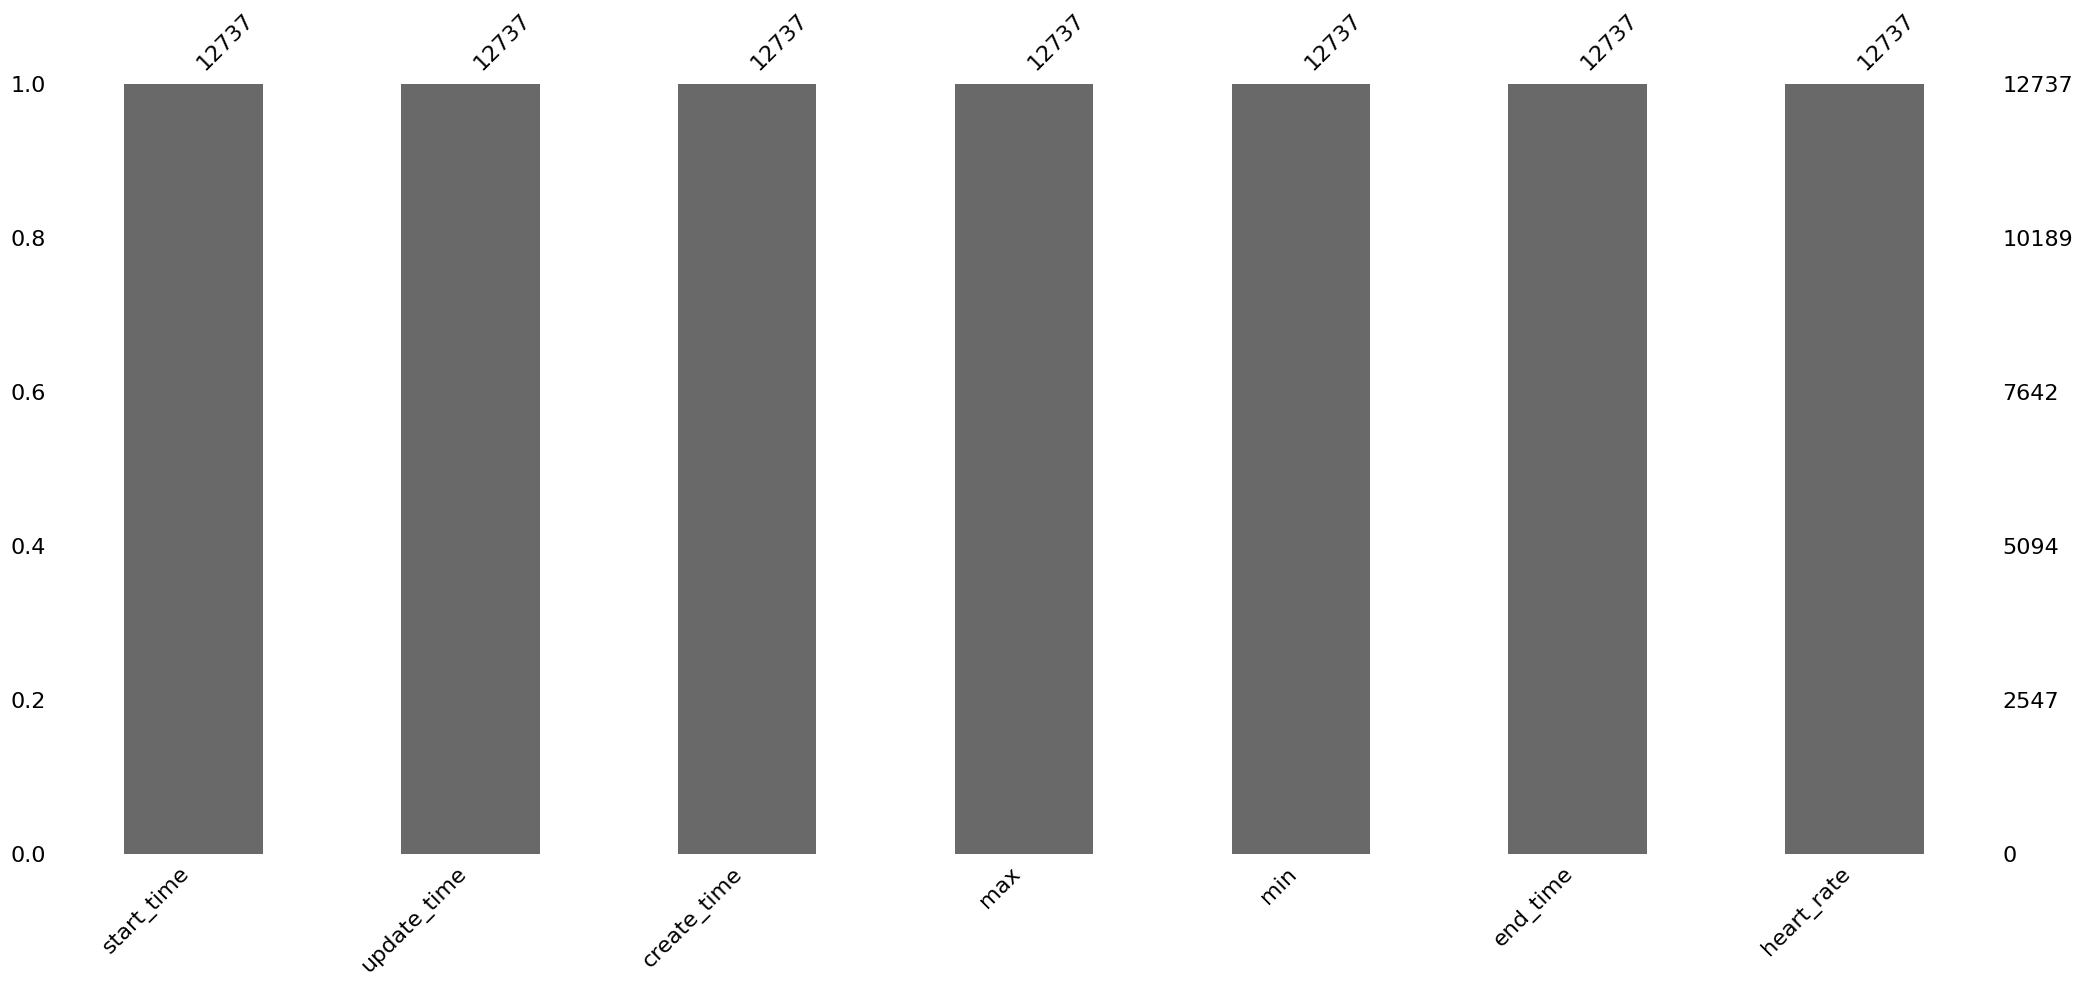

In [7]:
msno.bar(df_selecionadas)

##### ✅ **Conclusão parcial**: Os dados constam todos preenchidos, então os valores não estão nulos, e sim em branco.

In [8]:
df_selecionadas.head(100)

,start_time,update_time,create_time,max,min,end_time,heart_rate
0,2025-11-12 14:03:02.880,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,,,2025-11-12 14:03:02.880,123.0
1,2025-11-12 14:06:58.284,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,,,2025-11-12 14:06:58.284,77.0
2,2025-11-12 16:26:49.104,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,,,2025-11-12 16:26:49.104,91.0
3,2025-11-12 17:06:00.332,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,,,2025-11-12 17:06:00.332,91.0
4,2025-11-12 17:35:57.258,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,,,2025-11-12 17:35:57.258,89.0
...,...,...,...,...,...,...,...
95,2025-11-15 23:00:29.254,2025-11-15 23:02:04.703,2025-11-15 23:02:04.703,,,2025-11-15 23:00:29.254,89.0
96,2025-11-15 23:10:29.292,2025-11-15 23:10:53.155,2025-11-15 23:10:53.155,,,2025-11-15 23:10:29.292,91.0
97,2025-11-15 23:20:29.328,2025-11-15 23:22:04.750,2025-11-15 23:22:04.750,,,2025-11-15 23:20:29.328,89.0
98,2025-11-15 23:30:29.327,2025-11-15 23:36:24.320,2025-11-15 23:36:24.320,,,2025-11-15 23:30:29.327,83.0


##### ✅ **Conclusão parcial**: MAX e MIN indcam se tratar dos valores mínimos e máximos capturados entre o início da medição (start_time) e o fim (end_time). Essa variação entre segundos não é tão interessante para a análise quanto a série histórica. Vamos removê-las.

In [9]:
# RESTRINGINDO PARA MAIS COLUNAS
df_selecionadas = df_selecionadas[['start_time','update_time','create_time','end_time','heart_rate']]
df_selecionadas.head()

,start_time,update_time,create_time,end_time,heart_rate
0,2025-11-12 14:03:02.880,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,2025-11-12 14:03:02.880,123.0
1,2025-11-12 14:06:58.284,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,2025-11-12 14:06:58.284,77.0
2,2025-11-12 16:26:49.104,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,2025-11-12 16:26:49.104,91.0
3,2025-11-12 17:06:00.332,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,2025-11-12 17:06:00.332,91.0
4,2025-11-12 17:35:57.258,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,2025-11-12 17:35:57.258,89.0


In [10]:
# CONVERTENDO COLUNAS DE DATA-HORA DE CATEGORY PARA DATETIME E INT
for column in df_selecionadas.columns:
    if '_time' in column:
        df_selecionadas[column] = pd.to_datetime(df_selecionadas[column])

df_selecionadas['heart_rate'] = pd.to_numeric(df_selecionadas['heart_rate'])
df_selecionadas.head()

,start_time,update_time,create_time,end_time,heart_rate
0,2025-11-12 14:03:02.880,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,2025-11-12 14:03:02.880,123.0
1,2025-11-12 14:06:58.284,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,2025-11-12 14:06:58.284,77.0
2,2025-11-12 16:26:49.104,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,2025-11-12 16:26:49.104,91.0
3,2025-11-12 17:06:00.332,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,2025-11-12 17:06:00.332,91.0
4,2025-11-12 17:35:57.258,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,2025-11-12 17:35:57.258,89.0


In [11]:
# CONFIRMANDO SUCESSO DA CONVERSÃO
df_selecionadas.dtypes

start_time     datetime64[ns]
update_time    datetime64[ns]
create_time    datetime64[ns]
end_time       datetime64[ns]
heart_rate            float64
dtype: object

In [12]:
# LEMBRANDO DE ORDENAR O DATAFRAME POR HORA DE INÍCIO DA MEDIÇÃO
df_selecionadas = df_selecionadas.sort_values('start_time')

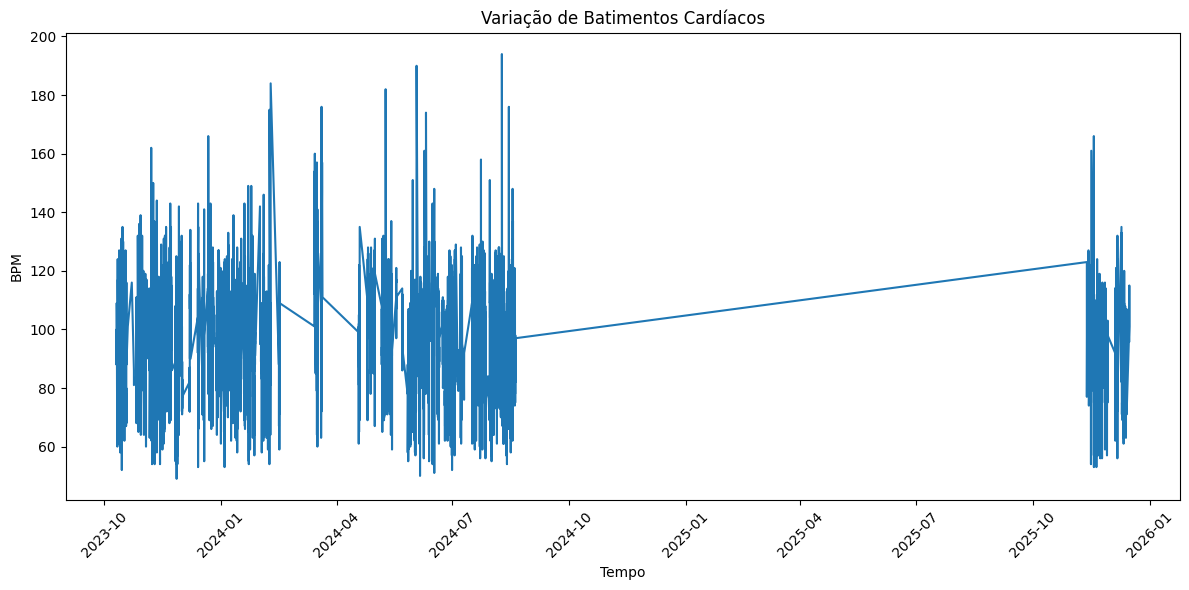

In [13]:
# VISUALIZAÇÃO INICIAL
plt.figure(figsize=(12, 6))
plt.plot(df_selecionadas['start_time'], df_selecionadas['heart_rate'])

plt.title('Variação de Batimentos Cardíacos')
plt.xlabel('Tempo')
plt.ylabel('BPM')

plt.xticks(rotation=45)

plt.tight_layout() 

plt.show()

##### ⚠️ As linhas entre os pontos de dados confundem: se tratam apenas de um gap entre eles ou alguma linha de tendência, medida central, etc? Um gráfico de dispersão funciona melhor  uma base assim.

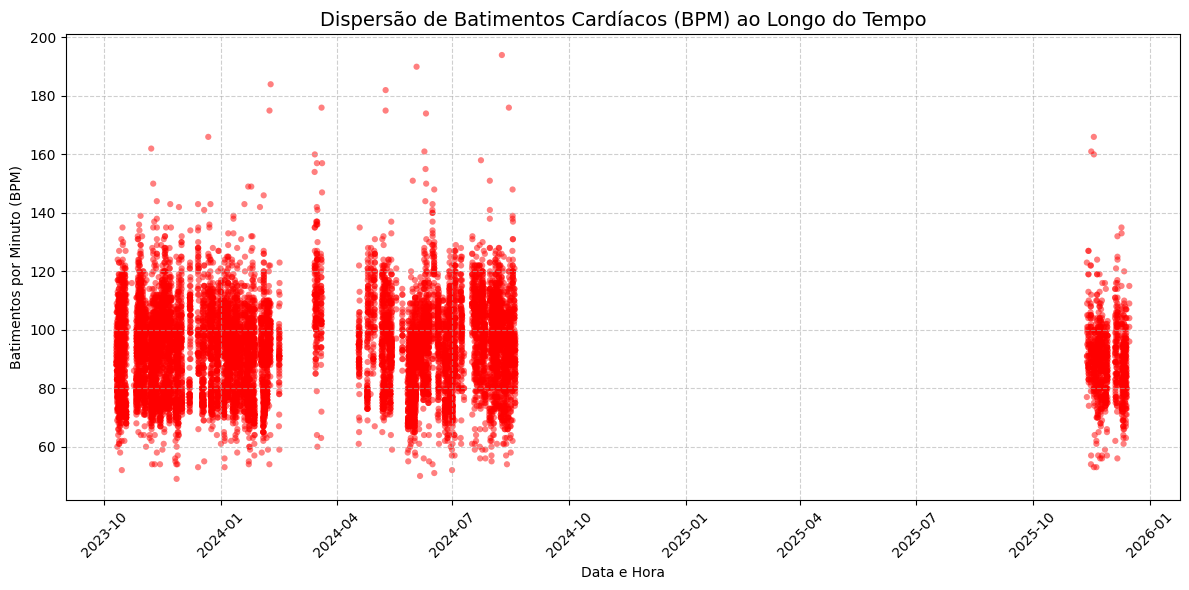

In [14]:
plt.figure(figsize=(12, 6))

plt.scatter(
    df_selecionadas['start_time'], 
    df_selecionadas['heart_rate'], 
    alpha=0.5,     
    s=20,        
    c='red',        
    edgecolors='none'
)

plt.title('Dispersão de Batimentos Cardíacos (BPM) ao Longo do Tempo', fontsize=14)
plt.xlabel('Data e Hora')
plt.ylabel('Batimentos por Minuto (BPM)')

plt.xticks(rotation=45) 
plt.grid(True, linestyle='--', alpha=0.6) 
plt.tight_layout()

plt.show()

##### ✅ **Conclusão parcial**: O relógio criou "ilhas" de concentração de medições entre os quais há muitos gaps temporais. Seria interessante distingui-las.

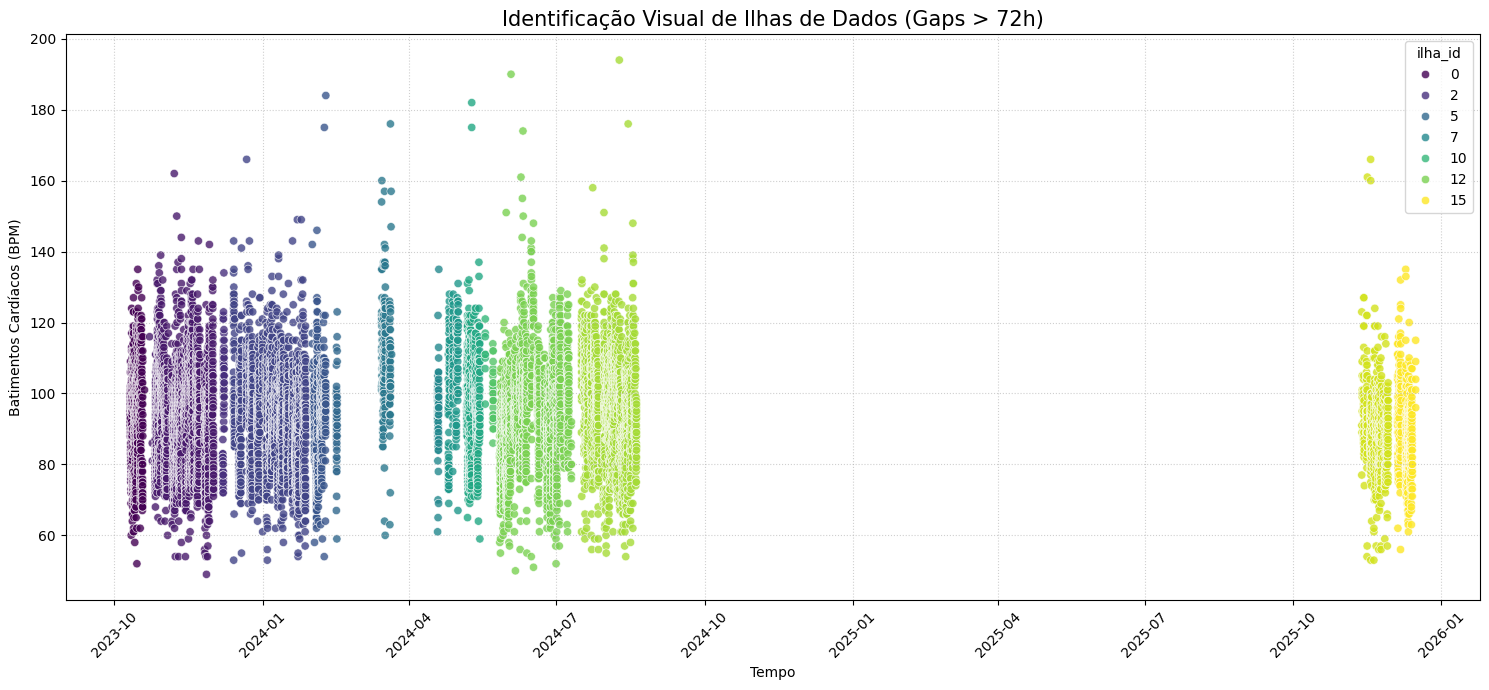

In [15]:
# AVALIANDO GAP DE TEMPO ENTRE CADA INÍCIO DE MEDIÇÃO
df_selecionadas['diff_tempo'] = df_selecionadas['start_time'].diff()
# SEPARANDO O DF EM ILHAS SEPARADAS PELO LIMITE DE 72H (ESTIPULADO POR TENTATIVA E ERRO -- PARECE SER O QUE FUNCIONOU MELHOR)
df_selecionadas['ilha_id'] = (df_selecionadas['diff_tempo'] > pd.Timedelta(hours=72)).cumsum()

plt.figure(figsize=(15, 7))

sns.scatterplot(
    data=df_selecionadas, 
    x='start_time', 
    y='heart_rate', 
    hue='ilha_id', 
    palette='viridis', 
    alpha=0.8
)

plt.title('Identificação Visual de Ilhas de Dados (Gaps > 72h)', fontsize=15)
plt.xlabel('Tempo')
plt.ylabel('Batimentos Cardíacos (BPM)')
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

In [16]:
# IDENTIFICANDO NÚMERO DE ILHAS DISTINGUIDAS 
df_selecionadas['ilha_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

##### 🔎 Será que a média varia muito entre ilhas?

In [17]:
media_por_ilha = []
for ilha in df_selecionadas['ilha_id'].unique():
    media = df_selecionadas[df_selecionadas['ilha_id'] == ilha]['heart_rate'].mean()
    media_por_ilha.append(media)
    print(f"Média da Ilha {ilha}: {media}")

Média da Ilha 0: 91.9110824742268
Média da Ilha 1: 92.78931860036832
Média da Ilha 2: 96.45
Média da Ilha 3: 92.01041232819658
Média da Ilha 4: 91.58058608058609
Média da Ilha 5: 92.26785714285714
Média da Ilha 6: 110.30845771144278
Média da Ilha 7: 93.63414634146342
Média da Ilha 8: 100.33663366336634
Média da Ilha 9: 94.8353765323993
Média da Ilha 10: 111.25
Média da Ilha 11: 99.4
Média da Ilha 12: 92.22153110047847
Média da Ilha 13: 96.57952182952182
Média da Ilha 14: 89.41021416803954
Média da Ilha 15: 88.90654205607477


##### 🔎 Parece que não. Vamos confirmar com um boxplot.

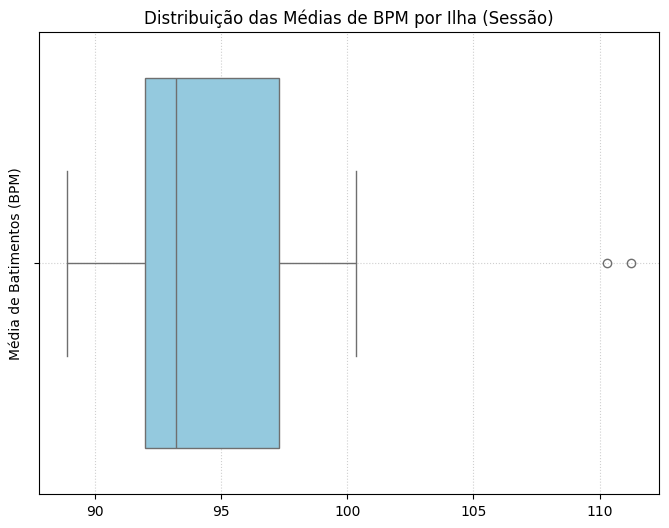

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=media_por_ilha, color='skyblue')

plt.title('Distribuição das Médias de BPM por Ilha (Sessão)')
plt.ylabel('Média de Batimentos (BPM)')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

##### ✅ **Conclusão parcial**: Os dados são bem distribuídos, mas com distorção à direita. O que um histograma mostraria?

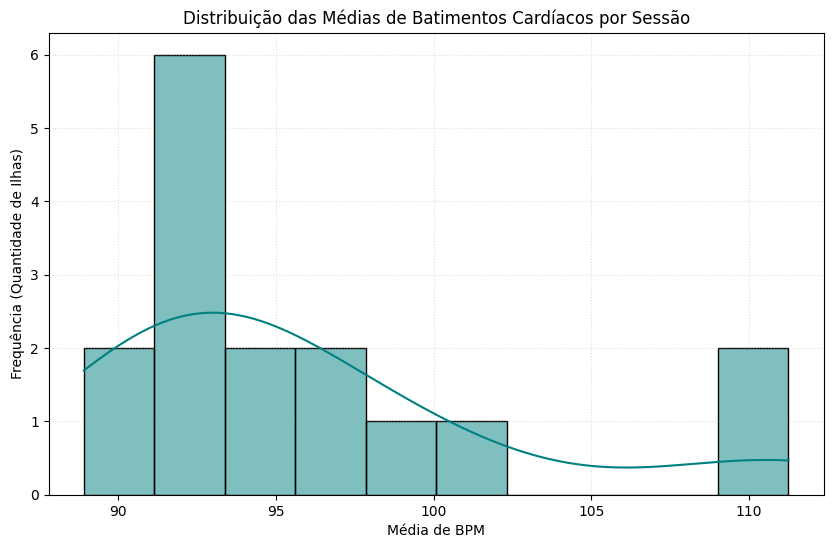

In [19]:
plt.figure(figsize=(10, 6))

sns.histplot(media_por_ilha, kde=True, bins=10, color='teal')

plt.title('Distribuição das Médias de Batimentos Cardíacos por Sessão')
plt.xlabel('Média de BPM')
plt.ylabel('Frequência (Quantidade de Ilhas)')
plt.grid(True, linestyle=':', alpha=0.4)

plt.show()

##### ✅ **Conclusão parcial**: Confirma-se a impressão sobre a distribuição das médias: a maior parte dos dados se concentram entre 90 e 100, com dois outliers além dos 100. Aqui, vale o contexto: estamos falando de BPM, em que uma variação de 10 pontos não é tão significativa. Vamos deixar essa distorção de lado.

In [20]:
print(f"O BPM médio dentre as médias de cada ilha de dados é {np.mean(media_por_ilha).round(1)}.")

O BPM médio dentre as médias de cada ilha de dados é 95.9.


##### 🎉 **Conclusão chave**: entre cada período de medição frequente dos meus batimentos cardíacos, a média fica em +- **96 BPM**.

##### 🔎 Um ponto interessante a se avaliar é o início do meu processo terapêutico no primeiro trimestre de 2025. Será que se percebe o fim das crises taquicárdicas provocadas por ansiedade?

In [21]:
df_1 = df_selecionadas[df_selecionadas['start_time']<'2025-03-01']
df_2 = df_selecionadas[df_selecionadas['start_time']>='2025-03-01']

##### ⚠️ O segundo df resultará bem mais curto que o primeiro; afinal, o relógio está me medindo desde out/23 até hoje, dez/25, e a terapia começou em mar/25. Vamos ver quantas linhas há nele e selecionar a mesma quantidade de pontos de dados do fim do primeiro, para ficarem equilibrados e a comparação ser justa.

In [22]:
df_2.shape

(1035, 7)

In [23]:
df_1 = df_1.sort_values('start_time').tail(1035)
df_1.shape

(1035, 7)

In [24]:
media_antes = df_1['heart_rate'].mean().round(1)
media_depois = df_2['heart_rate'].mean().round(1)

In [25]:
print(f'A média de batimentos cardíacos antes da terapia foi de {media_antes} e depois, de {media_depois}. Houve uma redução de {((((media_antes-media_depois)/media_antes)) * 100).round(1)}%.')

A média de batimentos cardíacos antes da terapia foi de 95.3 e depois, de 89.2. Houve uma redução de 6.4%.


C:\Users\julia\AppData\Local\Temp\ipykernel_22504\3315036198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Fase'] = 'Depois da Terapia'
C:\Users\julia\AppData\Local\Temp\ipykernel_22504\3315036198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comparacao, x='Fase', y='heart_rate', palette='Set2')


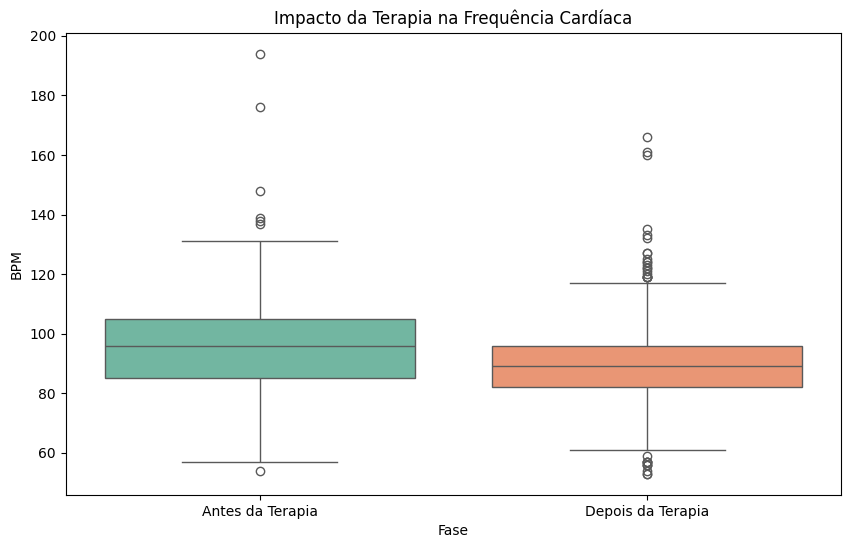

In [26]:
df_1['Fase'] = 'Antes da Terapia'
df_2['Fase'] = 'Depois da Terapia'

df_comparacao = pd.concat([df_1, df_2])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_comparacao, x='Fase', y='heart_rate', palette='Set2')
plt.title('Impacto da Terapia na Frequência Cardíaca')
plt.ylabel('BPM')
plt.show()

##### 🎉 **Conclusão chave**: houve progresso mensurável nos episódios de taquicardia notados antes e depois do processo terapêutico, o que indica que os ganhos psíquicos provocados pela regulação mental e emocional se traduziu em efeitos fisiológicos reais: redução de 6% na média da frequência cardíaca, que atingiu nível inferior à média do histórico total.